In [1]:
import sys
sys.path.append('..')
from backtester import matlab
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
d, info = matlab.loaddata('../mat/strategy_270225.mat')

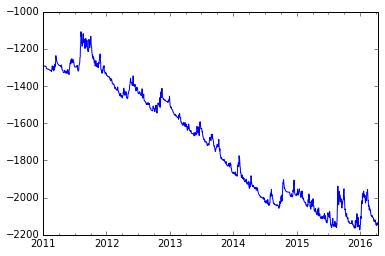

In [4]:
d.exo.plot()

In [5]:
info

{'legs': 4,
 'name': 'BearishCollarBrokenWing',
 'pcf': array([1, 2, 0, 1], dtype=uint8),
 'pcfqty': array([-1, -1,  1,  1], dtype=int16),
 'tickincrement': 0.25,
 'tickvalue': 12.5,
 'underlying': 'EP'}

In [35]:
data = d

direction = -1
entry_rule = pd.Series(index=price.index)
exit_rule = pd.Series(index=price.index)

month = pd.Series(d.index.month, index=d.index)

entry_rule = month != month.shift()

# Close position 3 days before new month
# this is a future reference, only for test purposes
exit_rule = month != month.shift(-3) 


In [36]:
price = data['exo']

pl = pd.Series(index=price.index)
inpositon = pd.Series(index=price.index)

In [37]:
start_idx = -1
inpos = False

for i, px in enumerate(price):
    if not inpos:        
        # We have a signal, let's open position
        if entry_rule.values[i] == 1:
            start_idx = i
            pl.values[i] = 0
            inpos = True
            inpositon.values[i] = 1            
        else:
            inpositon.values[i] = 0
            
    else:
        # Calculate pl
        pl.values[i] = (price.values[i] - price.values[start_idx])*direction
        inpositon.values[i] = 1        
        
        if exit_rule.values[i] == 1:
            start_idx = -1
            inpos = False
    
    